In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 6.S077 Problem Set 2

## Problem 2-3.

In [2]:
df = pd.read_csv('data_problem_3.csv', header=None)
X = df[0].values

### Part B

First we calculate the mean of the sample, $\bar{X}$.

In [3]:
X_bar = np.mean(X)

In [4]:
X_bar

1.8531340622174737

We can also calculate the sample median of the data $\hat{m}$ which is the observed value of the random variable $\hat{M}$.

In [5]:
m_hat = np.median(X)

In [6]:
m_hat

1.687111513319729

### Part C

Using the principle of bootstrap, we generate many new samples from the empirical distribution using replacement. We calculate the median from each bootstrap sample.

In [7]:
m_hat_samples = []

for _ in range(10000):
    
    X_bootstrap = np.random.choice(X, size=101, replace=True)
    
    m_hat_samples.append(np.median(X_bootstrap))

We plot the distributions of medians from each bootstrap sample.

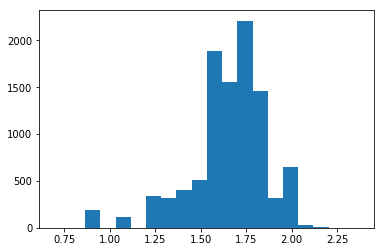

In [8]:
_ = plt.hist(m_hat_samples, bins=20)

### Part D

The bias of our estimate is given by the difference between our $\hat{m}$ and the median of our parameter distribution.

In [9]:
bias = np.median(m_hat_samples) - m_hat

In [10]:
bias

0.0

The standard error is just the standard deviation of the parameter distribution.

In [11]:
standard_error = np.std(m_hat_samples)

In [12]:
standard_error

0.20865421126728512

### Part E

To develop a confidence interval, we sort the data and select the 2.5  and 97.5 percentile statistics. This leaves an interval of 95\%.

In [13]:
m_hat_samples_sorted = np.sort(m_hat_samples)

In [14]:
lower_tail = m_hat_samples_sorted[int(10000 * 0.025)]
upper_tail = m_hat_samples_sorted[-int(10000 * 0.025)]

Using these statistics, we calculate the distance between the 2.5 percentile and our original "true" estimate as $a$ and the distance from our original "true" estimate to the 97.5 percentile as $b$.

In [15]:
a = m_hat - lower_tail
b = upper_tail - m_hat

Using $a$ and $b$, our confidence interval is,
$$ \mathbb{P} \left(\hat{\Theta} - b \leq \theta \leq \hat{\Theta} + a\right) = 0.95 $$

In [16]:
confidence_interval = (m_hat - b, m_hat + a)

In [17]:
confidence_interval

(1.3776784547758296, 2.3189492586329896)